## Import Stuff

In [18]:
import sqlite3
import datetime as dt
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [3]:
PATH = '/Users/younheepernling/Dropbox/Apps/BabyTracker/backup/18BF3415-FED5-465F-A9FD-011FECA0EB78__1A078E9D-18AD-418D-8BCB-5A1B3EFFFD13/2019-02-11T09-41-42Z/EasyLog.db'

In [4]:
db = sqlite3.connect(PATH)

In [5]:
# Get all table names in the data base
cursor = db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('SickDesc',), ('BathDesc',), ('SleepDesc',), ('FeedDesc',), ('OtherActivityDesc',), ('MilestoneSelection',), ('DoctorSelection',), ('MedicineSelection',), ('VaccineSelection',), ('OtherFeedSelection',), ('AllergenSourceSelection',), ('SleepLocationSelection',), ('OtherActivityLocationSelection',), ('Baby',), ('Picture',), ('Pump',), ('Milestone',), ('OtherActivity',), ('Bath',), ('Diaper',), ('Sleep',), ('Nursing',), ('OtherFeed',), ('Pumped',), ('Formula',), ('Temperature',), ('Allergen',), ('HealthQuestion',), ('Medicine',), ('Vaccine',), ('Sick',), ('Growth',), ('DoctorVisit',), ('DoctorVisitMedicine',), ('Joy',), ('Journal',), ('TransactionLog',), ('sqlite_sequence',), ('PhotoList',), ('PhotoDownloadList',), ('MergedTransaction',), ('ReliveList',)]


## Get Sleep Data

In [6]:
table_sleep = pd.read_sql_query("SELECT * from sleep", db)

In [7]:
table_sleep.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,Duration,LocationID,DescID
0,E6C21B18-6E48-44FD-86E0-CED1844A8A51,1.528998e+09,1.528995e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,45,None,None
1,31987997-E9A5-4659-AD88-27960B627594,1.529004e+09,1.528998e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,80,None,None
2,C17A2874-4197-4A4C-94E1-7E9D296D1397,1.529015e+09,1.529012e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,41,None,None
3,4C189005-AB26-4CA9-90EB-330719A6CFFD,1.529020e+09,1.529018e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,34,None,None
4,2AD43775-3D66-4215-86C2-335EB1D510C0,1.529023e+09,1.529021e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,37,None,None


In [8]:
# Drop columns note interesting
all_sleep = table_sleep.drop(['ID','Note','HasPicture','BabyID','LocationID','DescID','Time'], axis=1)

In [12]:
all_sleep.head()

,Timestamp,Duration
0,1.528998e+09,45
1,1.529004e+09,80
2,1.529015e+09,41
3,1.529020e+09,34
4,1.529023e+09,37


In [19]:
# Make the Timestamp into Data and Time
all_sleep['Date'] = all_sleep['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_sleep['Time'] = all_sleep['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_sleep = all_sleep.drop(['Timestamp'], axis=1)

In [20]:
all_sleep.head()

,Duration,Date,Time
0,45,2018-06-14,13:31:58.695606
1,80,2018-06-14,15:13:40.276892
2,41,2018-06-14,18:21:48.476691
3,34,2018-06-14,19:44:52.541131
4,37,2018-06-14,20:44:39.089874


In [22]:
all_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 3 columns):
Duration    1582 non-null int64
Date        1582 non-null object
Time        1582 non-null object
dtypes: int64(1), object(2)
memory usage: 37.2+ KB


In [ ]:
# Time can be used if you want to look in to when the baby is napping

### Alt 1. Look at sleep duration in graph

In [26]:
# Get the duration (in min) for each date
sleep_day = all_sleep.groupby('Date').sum()
sleep_day.head()

,Duration
Date,
2018-06-14,237
2018-06-15,788
2018-06-16,940
2018-06-17,963
2018-06-18,837


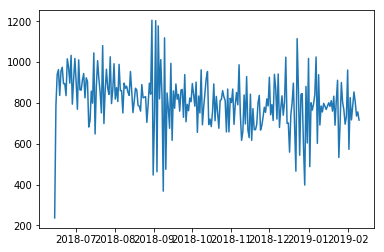

In [27]:
plt.plot(sleep_day)

### Alt 2. Look at sleep duration in graph

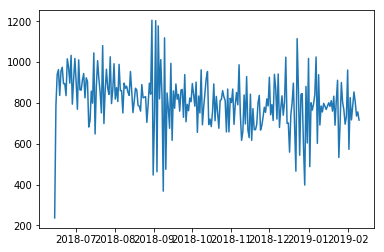

In [28]:
plt.plot(all_sleep.groupby(['Date'])['Duration'].sum())

### What day did the baby nap the most?

In [29]:
sleep_day.sort_values(by='Duration', ascending=False).head()

,Duration
Date,
2018-08-30,1205
2018-09-02,1203
2018-09-04,1177
2018-09-09,1119
2018-12-23,1115


### What day did the baby nap the least?

In [38]:
sleep_day.sort_values(by='Duration', ascending=True).head()

,Duration
Date,
2018-06-14,237
2018-09-08,368
2018-12-29,398
2018-08-31,447
2018-09-03,463


In [ ]:
# 2018-06-14 was the first day the app whas used and does not contain a full day of logging. 
# This day should be excluded from the data...

### What nap was the longest?

In [30]:
all_sleep.sort_values(by='Duration', ascending=False).head()

,Duration,Date,Time
1555,660,2019-02-05,06:56:39.328750
991,648,2018-10-31,08:12:24.260769
1222,638,2018-12-05,06:23:59.362753
1197,631,2018-12-01,07:04:25.986129
1515,627,2019-01-27,05:50:58.740794


### What nap was the shortest?

In [37]:
all_sleep.sort_values(by='Duration', ascending=True).head()

,Duration,Date,Time
1581,0,2019-02-10,20:36:36.442091
143,0,2018-07-04,22:23:47.970199
822,0,2018-10-07,20:51:46.150584
81,0,2018-06-26,02:46:00.943461
933,0,2018-10-23,06:03:45.645496


In [ ]:
# It seems like naps that start one day and finish the next are logged on the day that the nap finish
# Look into what can be done to this...

### Get more info about sleep per day

In [31]:
sleep_day.describe()

,Duration
count,242.000000
mean,807.504132
std,135.797208
min,237.000000
25%,737.000000
50%,811.500000
75%,879.500000
max,1205.000000


In [ ]:
# First day should be excluded, it is not a full day of data (as mentioned above)

## Get Nursing Data

In [52]:
table_feed = pd.read_sql_query("SELECT * from nursing", db)

In [53]:
table_feed.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,DescID,FinishSide,LeftDuration,RightDuration,BothDuration
0,0BB6B11B-56B7-40D1-B3AC-D4261D854558,1.528997e+09,1.528993e+09,Fell asleep after left side,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,15,0,0
1,2AAB21E8-4DE4-42D3-8AF5-65356620F03B,1.528998e+09,1.528997e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,2,0,10,0
2,68D7F445-D2E2-46E9-B5AF-0494DE4E560C,1.529006e+09,1.529006e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,12,0,0
3,963CE4DA-504F-4D36-A833-79D80CB520FF,1.529012e+09,1.529011e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,2,0,15,0
4,0888A437-DECE-40AA-BFB7-84E9C76EF92D,1.529015e+09,1.529015e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,None,1,8,0,0


In [54]:
# Drop columns note interesting
all_feed = table_feed.drop(['ID','Note','HasPicture','BabyID','DescID','Time'], axis=1)

In [55]:
# Make the Timestamp into Data and Time
all_feed['Date'] = all_feed['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_feed['Time'] = all_feed['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_feed = all_feed.drop(['Timestamp'], axis=1)

In [56]:
all_feed.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Date,Time
0,1,15,0,0,2018-06-14,13:15:18.110130
1,2,0,10,0,2018-06-14,13:41:26.209713
2,1,12,0,0,2018-06-14,15:59:14.162141
3,2,0,15,0,2018-06-14,17:25:41.034220
4,1,8,0,0,2018-06-14,18:31:21.744594


In [57]:
all_feed['Duration'] = all_feed['LeftDuration'] + all_feed['RightDuration']

In [58]:
all_feed.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Date,Time,Duration
0,1,15,0,0,2018-06-14,13:15:18.110130,15
1,2,0,10,0,2018-06-14,13:41:26.209713,10
2,1,12,0,0,2018-06-14,15:59:14.162141,12
3,2,0,15,0,2018-06-14,17:25:41.034220,15
4,1,8,0,0,2018-06-14,18:31:21.744594,8


In [59]:
# Get the duration (in min) for each date
feed_day = all_feed.groupby('Date').sum()
feed_day.head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2018-06-14,13,57,45,0,102
2018-06-15,24,90,74,0,164
2018-06-16,18,59,59,0,118
2018-06-17,19,56,58,0,114
2018-06-18,17,46,43,0,89


In [70]:
feed_day.sort_values(by='Duration', ascending=False).head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2018-06-15,24,90,74,0,164
2018-07-07,21,74,78,0,152
2018-07-11,23,67,82,0,149
2018-07-21,23,62,79,0,141
2018-07-20,25,73,66,0,139


In [71]:
feed_day.sort_values(by='Duration', ascending=True).head()

,FinishSide,LeftDuration,RightDuration,BothDuration,Duration
Date,,,,,
2019-02-09,4,8,3,0,11
2019-02-02,5,2,9,0,11
2019-02-08,5,5,7,0,12
2019-02-05,4,7,5,0,12
2019-02-10,5,4,9,0,13


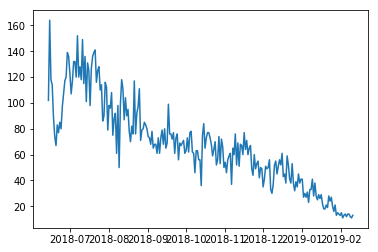

In [60]:
plt.plot(feed_day['Duration'])

In [ ]:
# Ar sleep och eat korrelerade?

In [ ]:
# Hur funkar sleep och eat med data from wonder weeks? Kan man se natt monster?

## Get Diaper Data

In [49]:
table_diaper = pd.read_sql_query("SELECT * from diaper", db)

In [50]:
table_diaper.head()

,ID,Timestamp,Time,Note,HasPicture,BabyID,Status,PeeColor,PooColor,Amount,Texture,Flag
0,A7E8EDDE-B026-4330-A615-E195A728D38A,1.529004e+09,1.529003e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,2,5,5,2,5,0
1,0995143E-53D4-493F-946D-2653CA439736,1.529012e+09,1.529010e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,2,5,5,2,5,0
2,59BBB1F9-B5D1-4A34-AC31-A1FDD2587085,1.529023e+09,1.529020e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,0,5,5,2,5,0
3,A2CADB32-222B-4A69-9605-59B253AB0ED3,1.529032e+09,1.529031e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,0,5,5,2,5,0
4,C4290E80-A6D1-4867-AE43-C5FC0EC4C590,1.529038e+09,1.529036e+09,None,0,75A12949-855C-4152-B232-EB9992FF3DC5,1,5,5,2,5,0


In [65]:
# Drop columns note interesting
all_diaper = table_diaper.drop(['ID', 'Time','Note','HasPicture','BabyID','PeeColor','PooColor','Amount','Texture','Flag'], axis=1)

In [66]:
# Make the Timestamp into Data and Time
all_diaper['Date'] = all_diaper['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).date())
all_diaper['Time'] = all_diaper['Timestamp'].map(lambda x: dt.datetime.fromtimestamp(x).time())
all_diaper = all_diaper.drop(['Timestamp'], axis=1)

In [67]:
all_diaper.head()

,Status,Date,Time
0,2,2018-06-14,15:13:28.063882
1,2,2018-06-14,17:26:32.668216
2,0,2018-06-14,20:36:51.960752
3,0,2018-06-14,23:12:55.856503
4,1,2018-06-15,00:44:09.614841


In [ ]:
# Status
# 0 = wet
# 1 = mix
# 2 = dirty

In [75]:
# Get the number of diapers for each date
diaper_day = all_diaper.groupby('Date').count()
diaper_day.head()

,Status,Time
Date,,
2018-06-14,4,4
2018-06-15,9,9
2018-06-16,9,9
2018-06-17,8,8
2018-06-18,9,9


In [76]:
diaper_day.sort_values(by='Status', ascending=False).head()

,Status,Time
Date,,
2018-07-15,13,13
2018-10-20,11,11
2018-06-29,10,10
2018-07-16,10,10
2018-10-07,10,10


In [77]:
diaper_day.sort_values(by='Status', ascending=True).head()

,Status,Time
Date,,
2018-06-14,4,4
2018-12-01,4,4
2018-12-07,4,4
2018-12-09,4,4
2018-12-23,4,4


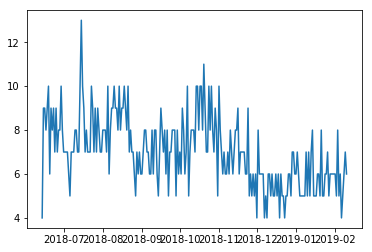

In [78]:
plt.plot(diaper_day['Status'])

In [ ]:
# Gor om sa att status laggs som kolumner istallet (har kan man nog anvanda dummy variabler...)